# Data Preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import io
import pyarrow.parquet as pq
import pickle

## Load Data

In [2]:
PATH_DATA='D:/DSLS/Data Science/data/raw/'

In [3]:
data_jams=pd.read_csv(PATH_DATA+'aggregate_median_jams_Kota Depok.csv', index_col=0)
data_irregularities=pd.read_csv(PATH_DATA+'aggregate_median_irregularities_Kota Depok.csv', index_col=0)
data_alerts=pd.read_csv(PATH_DATA+'aggregate_alerts_Kota Depok.csv', index_col=0)

data_jams merupakan dataframe yang berisikan kumpulan kemacetan yang terdeteksi pada Kota Depok. Suatu kemacetan terdeteksi dapat melalui 2 cara, yakni:
1. kalkulasi actual speed vs average-speed pada suatu segmen jalan yang terdeteksi dari GPS pengguna jalan
2. user-generated report yang mengidentifikasi suatu kemacetan

In [4]:
data_jams.head(3)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Tole Iskandar,2,867.0,127.0,14.00,1,33482698,2022-07-06,2.0,"LINESTRING (106.837496 -6.403788, 106.837451 -..."
1,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Bukit Cinere,3,421.0,92.0,10.26,1,33482683,2022-07-06,3.0,"LINESTRING (106.793532 -6.339868, 106.79333 -6..."
2,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Tole Iskandar,3,1236.0,186.0,13.66,11,33482699,2022-07-06,3.0,"MULTILINESTRING ((106.840781 -6.404241, 106.84..."


In [5]:
data_jams.shape

(157218, 13)

In [6]:
data_jams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157218 entries, 0 to 77389
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   time                       157218 non-null  object 
 1   kemendagri_kabupaten_kode  157218 non-null  float64
 2   kemendagri_kabupaten_nama  157218 non-null  object 
 3   street                     154459 non-null  object 
 4   level                      157218 non-null  int64  
 5   median_length              157218 non-null  float64
 6   median_delay               157218 non-null  float64
 7   median_speed_kmh           157218 non-null  float64
 8   total_records              157218 non-null  int64  
 9   id                         157218 non-null  int64  
 10  date                       157218 non-null  object 
 11  median_level               157218 non-null  float64
 12  geometry                   157218 non-null  object 
dtypes: float64(5), int64(3), objec

data_irregularities merupakan dataframe yang berisikan kemacetan yang teridentifikasi oleh waze yang bersifat irregular / atypical berdasarkan historical speed data pada kondisi yang sama.

In [7]:
data_irregularities.head(3)

,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,date,median_jam_level,id,geometry
time,,,,,,,,,,,,,,,
2022-07-06 07:00:00.000,32.76,KOTA DEPOK,Prof Dr Mr Supomo,3,535.0,460.0,21.00,2,NaN,567.0,3.390,2022-07-06,3.0,1493443,"LINESTRING (106.831075 -6.357956, 106.831177 -..."
2022-07-06 07:00:00.000,32.76,KOTA DEPOK,Bungur Raya,3,604.0,382.0,7.91,2,NaN,472.0,4.605,2022-07-06,3.0,1493441,"LINESTRING (106.808105 -6.368486, 106.808505 -..."
2022-07-06 07:00:00.000,32.76,KOTA DEPOK,Bungur Raya,4,604.0,481.0,9.40,19,NaN,571.0,3.800,2022-07-06,4.0,1493442,"MULTILINESTRING ((106.813307 -6.369841, 106.81..."


In [8]:
data_irregularities.shape

(8313, 15)

In [9]:
data_irregularities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8313 entries, 2022-07-06 07:00:00.000 to 2022-09-04 23:00:00.000
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   kemendagri_kabupaten_kode  8313 non-null   float64
 1   kemendagri_kabupaten_nama  8313 non-null   object 
 2   street                     8269 non-null   object 
 3   jam_level                  8313 non-null   int64  
 4   median_length              8313 non-null   float64
 5   median_delay_seconds       8313 non-null   float64
 6   median_regular_speed       8313 non-null   float64
 7   total_records              8313 non-null   int64  
 8   cause_type                 0 non-null      float64
 9   median_seconds             8313 non-null   float64
 10  median_speed               8313 non-null   float64
 11  date                       8313 non-null   object 
 12  median_jam_level           8313 non-null   float64
 13  id          

data_alerts merupakan dataframe yang berisikan alrets yang terjadi pada suatu segmen jalan. Jenis alert dapat berupa 
- kecelakaan
- kemacetan
- cuaca
- construction
- road cloased
- misc

In [10]:
data_alerts.head(3)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,type,avg_location,total_records,date
id,,,,,,,,
5931593,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Dewi Sartika,ROAD_CLOSED,"[106.81841149999966, -6.399794999999999]",240,2022-07-06
5931594,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,Krukut Raya,WEATHERHAZARD,"[106.79100399999993, -6.363434999999996]",60,2022-07-06
5931595,2022-07-06 00:00:00.000,32.76,KOTA DEPOK,NaN,JAM,"[106.783179, -6.443203999999998]",22,2022-07-06


In [11]:
data_alerts.shape

(18040, 8)

In [12]:
data_alerts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18040 entries, 5931593 to 6221717
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       18040 non-null  object 
 1   kemendagri_kabupaten_kode  18040 non-null  float64
 2   kemendagri_kabupaten_nama  18040 non-null  object 
 3   street                     16746 non-null  object 
 4   type                       18040 non-null  object 
 5   avg_location               18040 non-null  object 
 6   total_records              18040 non-null  int64  
 7   date                       18040 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [13]:
data_alerts.isnull().sum()

time                            0
kemendagri_kabupaten_kode       0
kemendagri_kabupaten_nama       0
street                       1294
type                            0
avg_location                    0
total_records                   0
date                            0
dtype: int64

## EDA

### Pusat Kemacetan

Melihat Ketersediaan dataset

In [14]:
print(data_jams.time.unique()[0])
print(data_jams.time.unique()[-1])

2022-07-06 00:00:00.000
2022-09-06 00:00:00.000


Dalam analisa ini, saya ingin melihat Kota Depok dari sudut pandang kemacetan yang terjadi di jalan-jalan depok serta irregularities yang mempengaruhi kemacetan-kemacetan tersebut berdasarkan rentang waktu 6 Juli 2022 ke 6 Agustus 2022

In [15]:
street_pv = pd.pivot_table(data_jams, 
                           values=['median_length','median_speed_kmh','median_delay'], 
                           index=['street'], 
                           aggfunc='mean')
street_pv.sort_values(by='median_length', ascending=False)

street_pv.head(10)

,median_delay,median_length,median_speed_kmh
street,,,
Abdul Gani 1,106.333333,234.222222,5.567778
Abdul Wahab,116.608317,802.208575,13.484794
Abdurrahman,128.037500,331.612500,5.989563
Acing,93.541667,305.041667,5.877083
Adhi Karya 2,295.250000,126.000000,1.580000
Akar Wangi 2,112.500000,152.000000,4.425000
Akar Wangi 4,109.250000,186.000000,5.455000
Akses Tol Cimanggis,135.773438,845.476562,16.410625
Akses Universitas Indonesia,143.067308,315.240385,6.898173


In [16]:
street_pv_irr = pd.pivot_table(data_irregularities, 
                           values=['median_length','median_speed','median_delay_seconds','median_regular_speed'], 
                           index=['street'], 
                           aggfunc='mean')
street_pv_irr.sort_values(by='median_length', ascending=False)

street_pv_irr.head(10)

,median_delay_seconds,median_length,median_regular_speed,median_speed
street,,,,
Abdul Wahab,488.258333,797.891667,19.599000,5.698333
Abdurrahman,429.000000,887.000000,12.567500,4.620000
Anggrek,411.333333,537.000000,20.726667,3.930000
Arah Tol Lkr Luar/TMII/Cawang,403.062500,617.062500,25.728750,6.399375
Arif Rahman Hakim,361.583333,619.023810,16.473929,5.821905
Bahagia,432.285714,693.285714,20.497857,5.601429
Bonang Raya,515.333333,815.083333,17.575417,4.917500
Bukit Cinere,486.100806,1095.125000,15.878105,6.688831
Bungur Raya,549.894558,606.102041,8.551054,3.754082


berdasarkan hasil pivot yang diberikan, dapat dilihat beberapa jalan utama yang telah menjadi pusat kemacetan di kota Depok

### Alerts Analysis

In [17]:
print(data_alerts.time.unique()[0])
print(data_alerts.time.unique()[-1])

2022-07-06 00:00:00.000
2022-09-06 00:00:00.000


<AxesSubplot:xlabel='type', ylabel='count'>

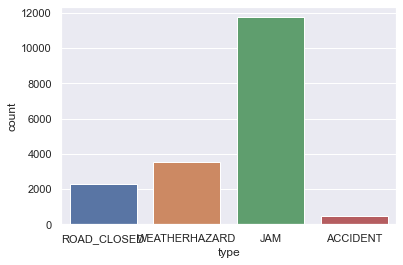

In [18]:
sns.set(style="darkgrid")
sns.countplot(x='type', data=data_alerts)

<AxesSubplot:xlabel='type', ylabel='count'>

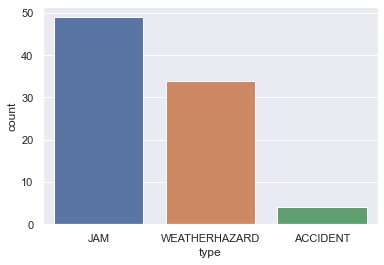

In [19]:
sns.countplot(x='type', data=data_alerts[data_alerts['street']=='Abdul Wahab'])

In [20]:
alerts_pv = pd.pivot_table(data_alerts, 
                           values='total_records', 
                           columns='type',
                           index=['street'], 
                           aggfunc='sum')

# street_pv_irr.sort_values(by='ACCIDENT', ascending=False)

alerts_pv.head(3)

type,ACCIDENT,JAM,ROAD_CLOSED,WEATHERHAZARD
street,,,,
Abdul Gani 1,NaN,12.0,NaN,NaN
Abdul Wahab,149.0,1354.0,NaN,1806.0
Abdurrahman,NaN,59.0,NaN,NaN


In [21]:
alerts_pv['ACCIDENT'].sort_values(ascending=False).head(10)

street
Tol Jagorawi           1593.0
Jeruk                   843.0
Muhtar Raya             688.0
Anggrek 20              458.0
Jalan Raya Bogor        364.0
Tanah Baru              354.0
N8 Jalan Raya Bogor     328.0
Sawangan Raya           319.0
Citayam Raya            303.0
Ir H Juanda             270.0
Name: ACCIDENT, dtype: float64

In [22]:
alerts_pv['ROAD_CLOSED'].sort_values(ascending=False).head(10)

street
Dewi Sartika    346252.0
Krukut Raya      73206.0
Mahoni              42.0
Gandul Raya         41.0
Pemuda              26.0
Abdul Gani 1         NaN
Abdul Wahab          NaN
Abdurrahman          NaN
Acing                NaN
Adhi Karya           NaN
Name: ROAD_CLOSED, dtype: float64

In [23]:
alerts_pv['WEATHERHAZARD'].sort_values(ascending=False).head(10)

street
Tol Jagorawi             33953.0
Karanggan                14763.0
Anggrek 20               10695.0
PLN Gandul                6812.0
Ir H Juanda               6724.0
Vila Pertiwi              5389.0
Pangkalan Jati            5208.0
Sawangan Elok             4614.0
Jalan SDN 06 Kalibaru     4424.0
Kota Kembang Raya         3232.0
Name: WEATHERHAZARD, dtype: float64

### Road Analysis

In [24]:
def get_street_data(df, street: str ):
    df = df.copy()
    df = df[df['street']==street]
    df.reset_index(inplace=True, drop=True)
    print(f"Getting {street} subset from data, result: {df.shape}")
    return df


def categorize_days(df):
    df['weekdays'] = df.apply(lambda x: x['time'].weekday(), axis=1)
    return df

In [25]:
trial = get_street_data(data_jams, 'Dewi Sartika')

# convert timestamps to datetime
trial['time'] = pd.to_datetime(trial['time'], format='%Y-%m-%d %X.000')

# categorize timestamps to weekdays
trial2 = categorize_days(trial)

# categorize timestamps to time on day
trial2['time_on_day'] =  trial2['time'].dt.hour

trial.head(3)

Getting Dewi Sartika subset from data, result: (1546, 13)


,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,weekdays,time_on_day
0,2022-07-06 00:00:00,32.76,KOTA DEPOK,Dewi Sartika,5,52.5,-1.0,0.0,240,33482684,2022-07-06,5.0,"MULTILINESTRING ((106.818279 -6.399806, 106.81...",2,0
1,2022-07-06 01:00:00,32.76,KOTA DEPOK,Dewi Sartika,5,52.5,-1.0,0.0,244,33482704,2022-07-06,5.0,"MULTILINESTRING ((106.818279 -6.399806, 106.81...",2,1
2,2022-07-06 02:00:00,32.76,KOTA DEPOK,Dewi Sartika,5,52.5,-1.0,0.0,240,33482711,2022-07-06,5.0,"MULTILINESTRING ((106.818279 -6.399806, 106.81...",2,2


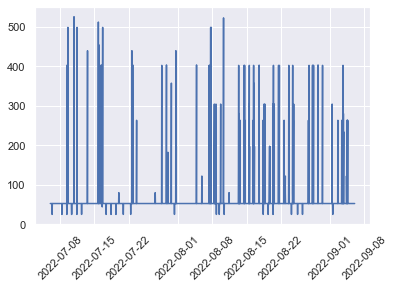

In [26]:
plt.plot(trial['time'], trial['median_length'])
plt.xticks(rotation = 45)
plt.show()

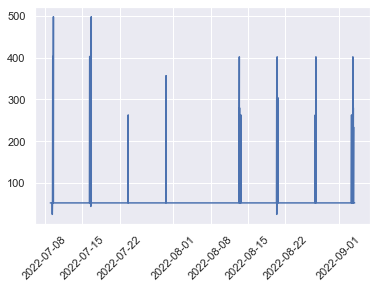

In [27]:
trial2_d = trial2[trial2['weekdays'] == 5]
plt.plot(trial2_d['time'], trial2_d['median_length'])
plt.xticks(rotation = 45)
plt.show()

In [28]:
def average_weekdays_on_time(df, day: int):
    new = df[df['weekdays']==day].copy()
    new_pv = pd.pivot_table(new, 
                           values=['median_length','median_speed_kmh','median_delay'], 
                           index=['time_on_day'], 
                           aggfunc='mean')
    new_pv.reset_index(inplace=True)
    return new_pv

In [29]:
trial_pv = average_weekdays_on_time(trial2, 1)
trial_pv.head()

,time_on_day,median_delay,median_length,median_speed_kmh
0,0,-1.0,52.5,0.0
1,1,-1.0,52.5,0.0
2,2,-1.0,52.5,0.0
3,3,-1.0,52.5,0.0
4,4,-1.0,52.5,0.0


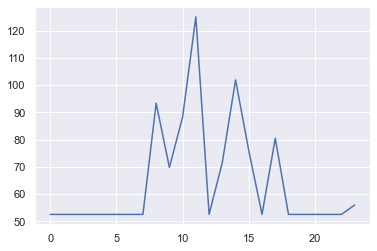

In [30]:
plt.plot(trial_pv['time_on_day'], trial_pv['median_length'])
plt.xticks()
plt.show()

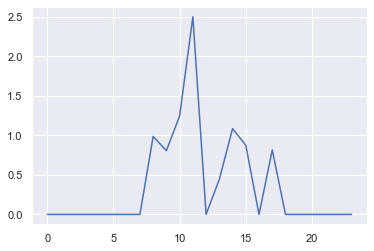

In [31]:
plt.plot(trial_pv['time_on_day'], trial_pv['median_speed_kmh'])
plt.xticks()
plt.show()

In [32]:
def plot_tod_on_street(df, street: str, metric: str, plot: bool):
    
    # get street data
    df1 = get_street_data(df, street)

    # convert timestamps to datetime
    df1['time'] = pd.to_datetime(df1['time'], format='%Y-%m-%d %X.000')

    # categorize timestamps to weekdays
    df2 = categorize_days(df1)

    # categorize timestamps to time on day
    df2['time_on_day'] =  df2['time'].dt.hour
    
    # plot days 
    store = dict()
    for d in range(7):
        # average weekdays on time for forecasting model
        d_pv = average_weekdays_on_time(df2, d)
        store[d] = d_pv
        
        if plot:
            plt.plot(d_pv['time_on_day'], d_pv[metric])
            plt.title(f"{metric} in {street} on day:{d}")
            plt.xticks()
            plt.show()
        else:
            pass
        
    return store

Getting Tol Jagorawi subset from data, result: (935, 13)


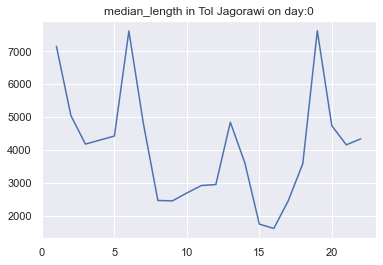

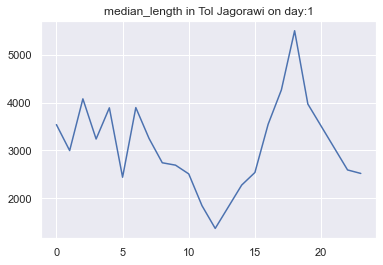

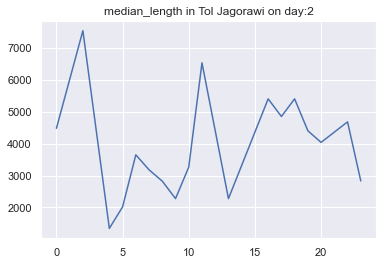

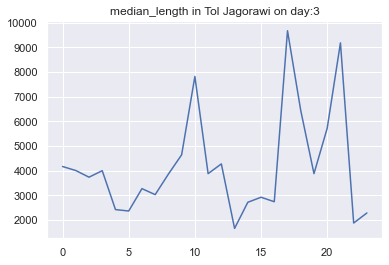

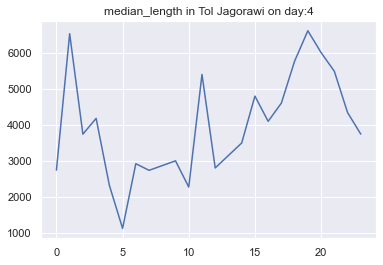

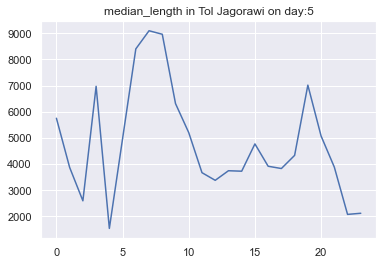

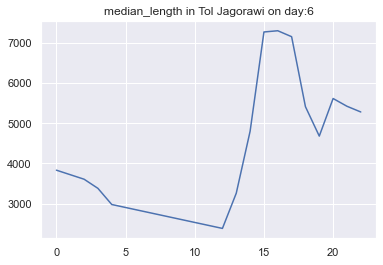

In [33]:
mems = plot_tod_on_street(data_jams, 'Tol Jagorawi', 'median_length', True )

In [34]:
bussiest_streets = street_pv_irr.head(10).index.to_list()
bussiest_streets

['Abdul Wahab',
 'Abdurrahman',
 'Anggrek',
 'Arah Tol Lkr Luar/TMII/Cawang',
 'Arif Rahman Hakim',
 'Bahagia',
 'Bonang Raya',
 'Bukit Cinere',
 'Bungur Raya',
 'Cagar Alam Selatan']

Getting Abdul Wahab subset from data, result: (1551, 13)


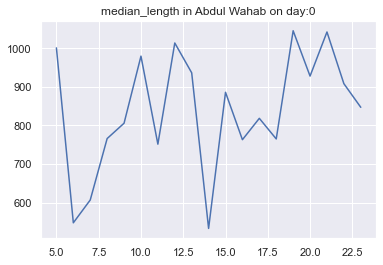

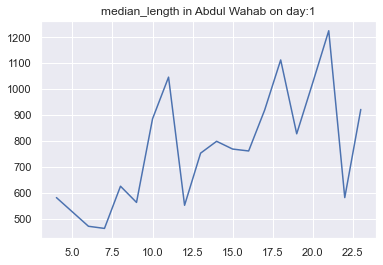

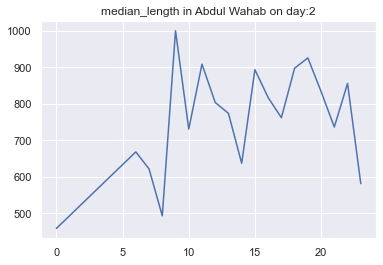

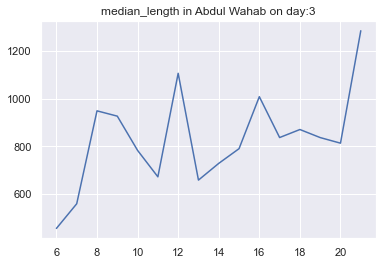

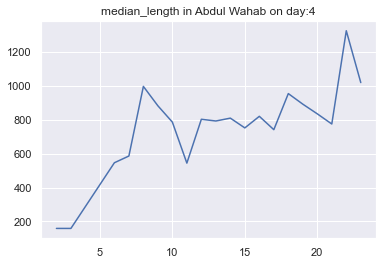

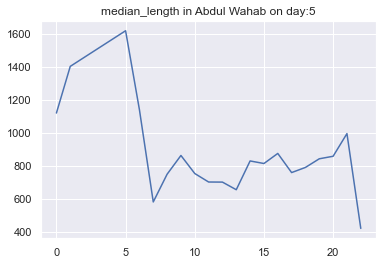

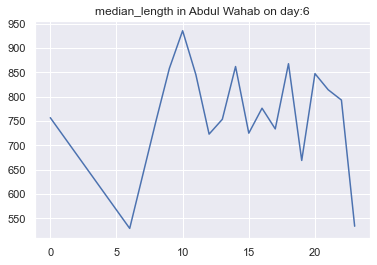

Getting Abdurrahman subset from data, result: (80, 13)


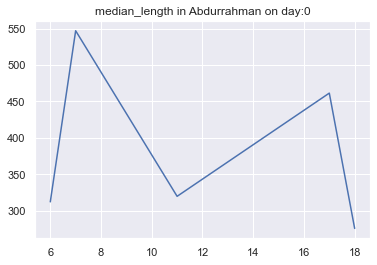

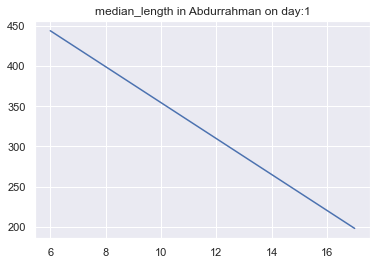

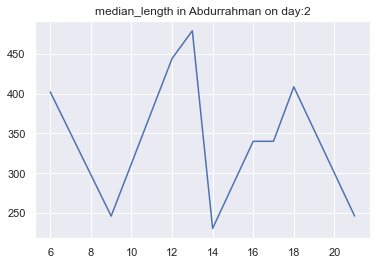

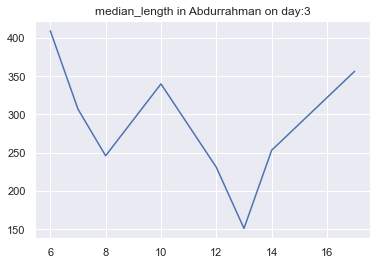

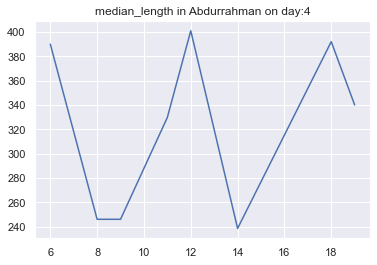

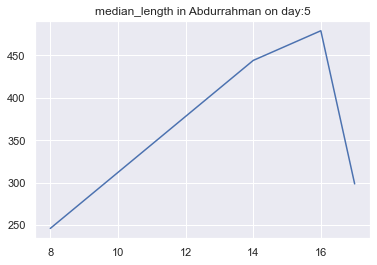

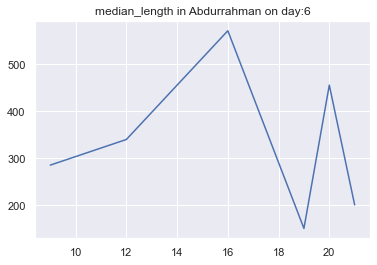

Getting Anggrek subset from data, result: (161, 13)


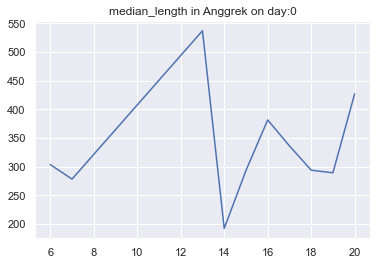

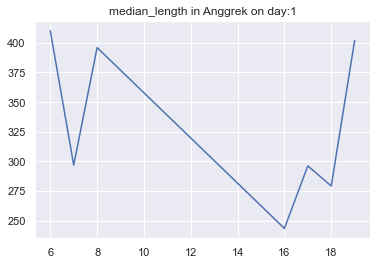

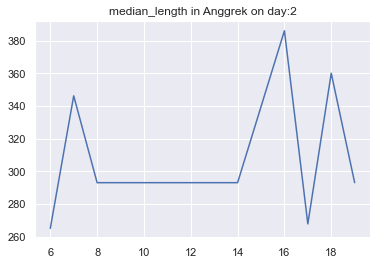

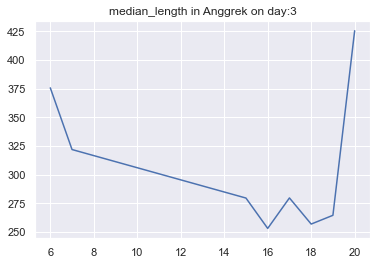

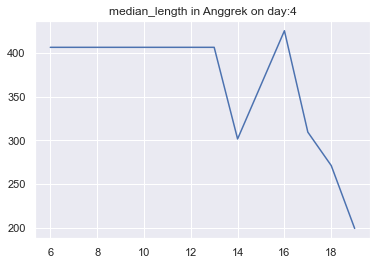

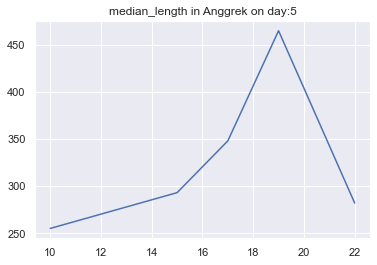

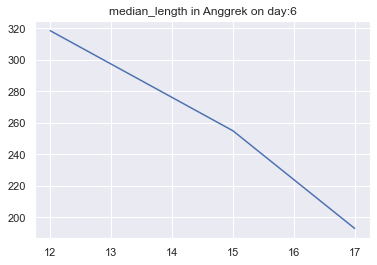

Getting Arah Tol Lkr Luar/TMII/Cawang subset from data, result: (169, 13)


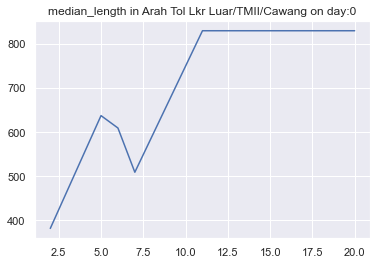

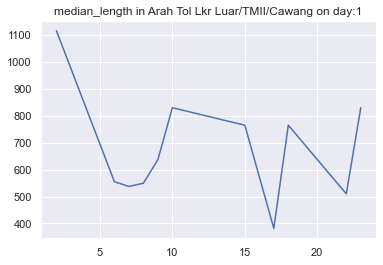

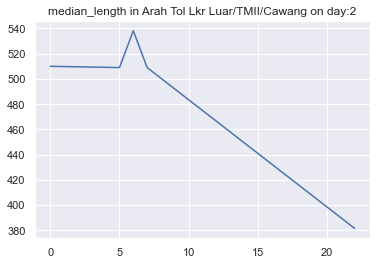

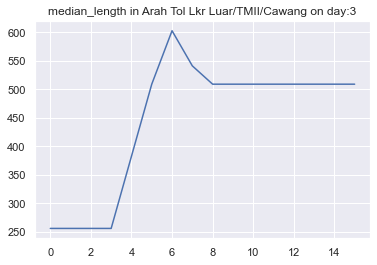

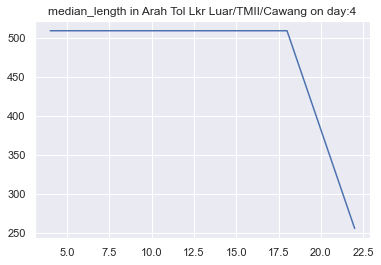

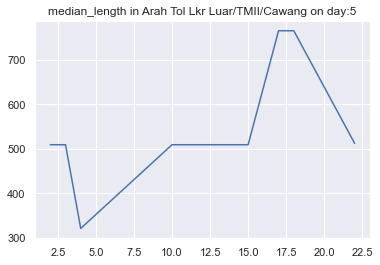

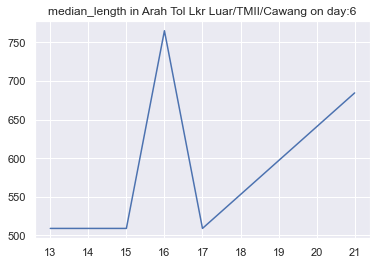

Getting Arif Rahman Hakim subset from data, result: (1793, 13)


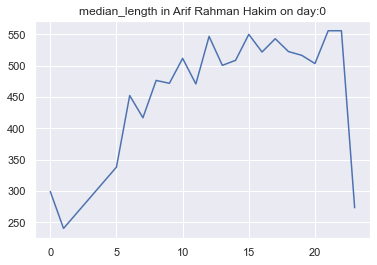

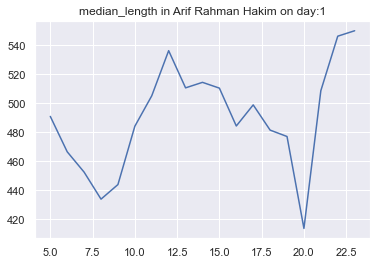

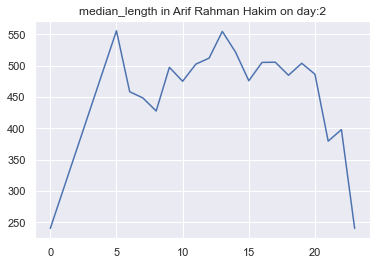

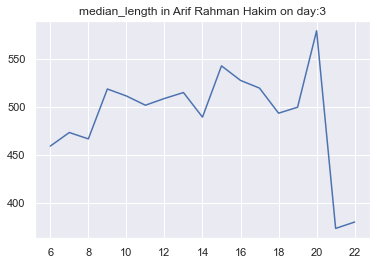

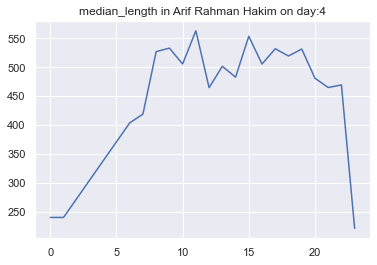

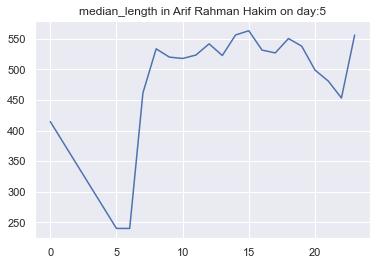

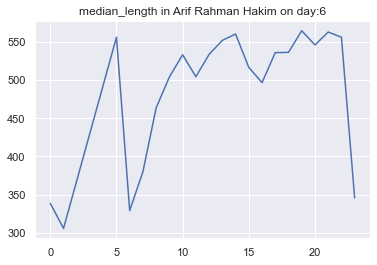

Getting Bahagia subset from data, result: (1071, 13)


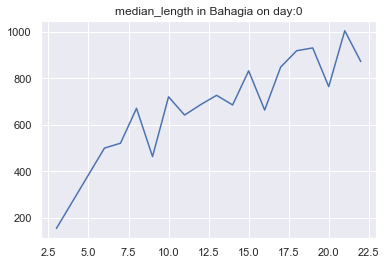

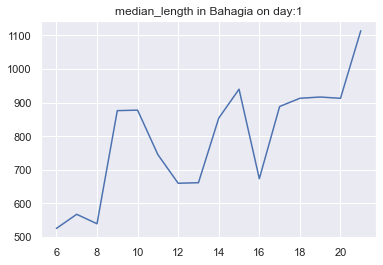

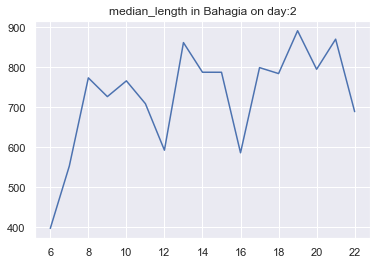

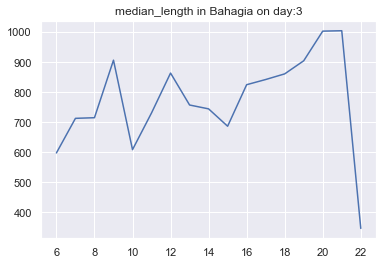

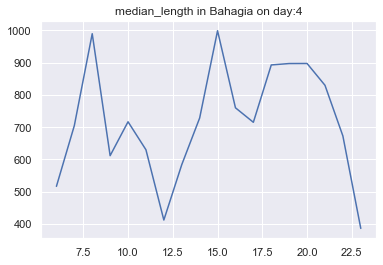

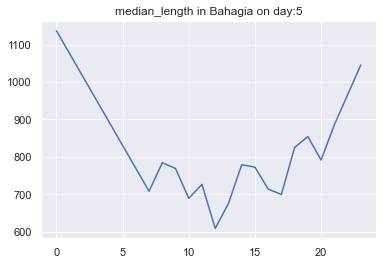

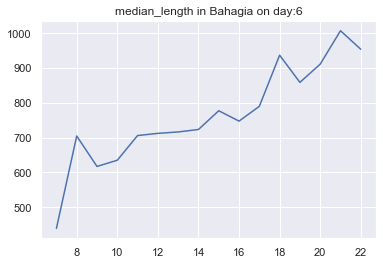

Getting Bonang Raya subset from data, result: (963, 13)


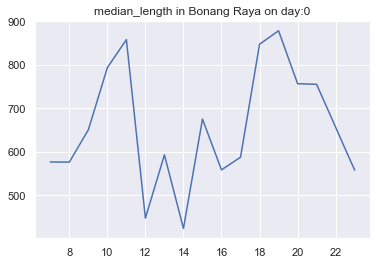

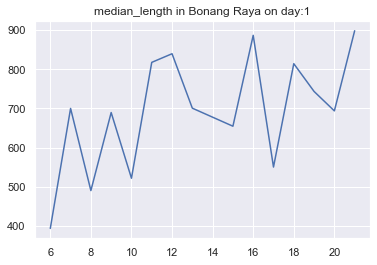

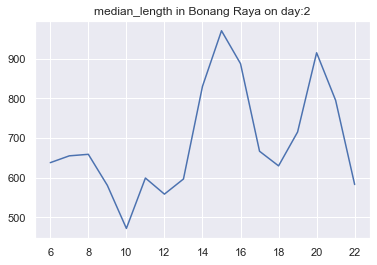

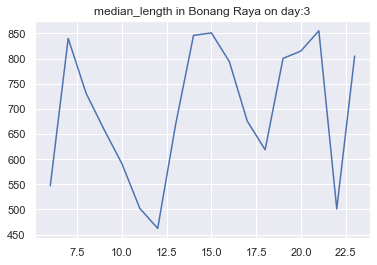

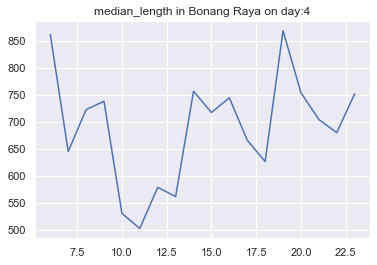

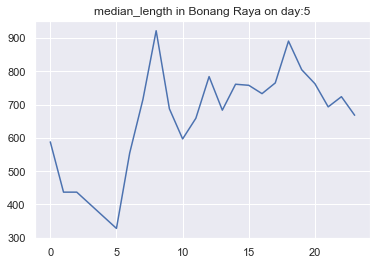

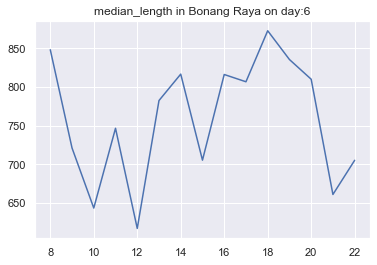

Getting Bukit Cinere subset from data, result: (2301, 13)


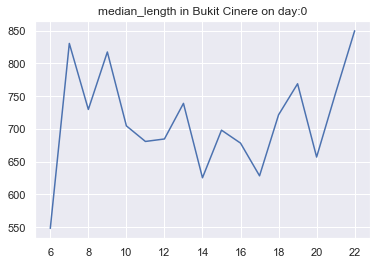

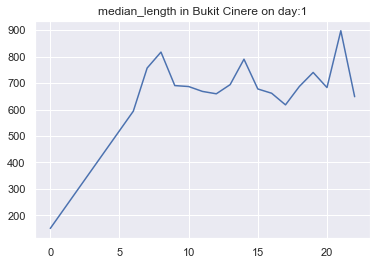

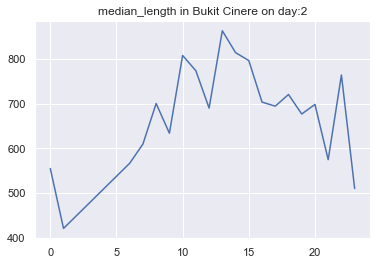

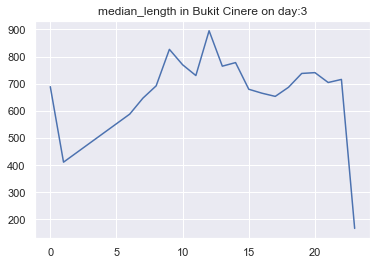

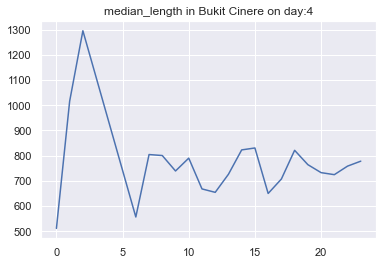

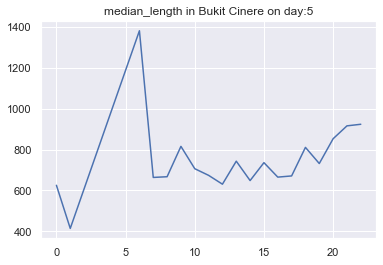

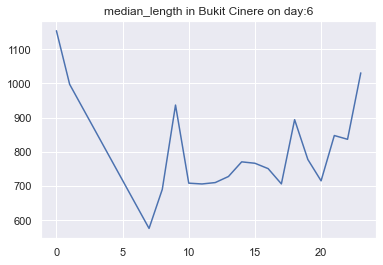

Getting Bungur Raya subset from data, result: (2602, 13)


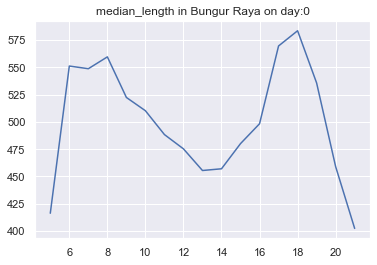

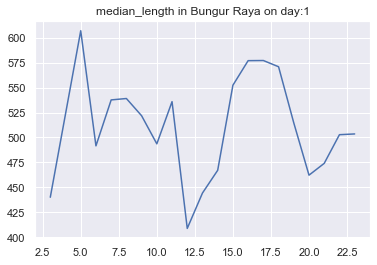

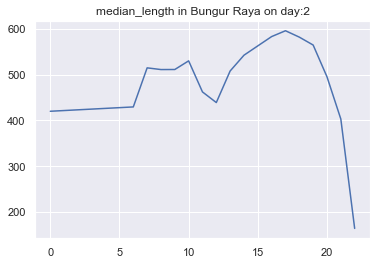

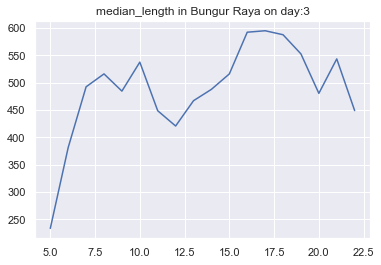

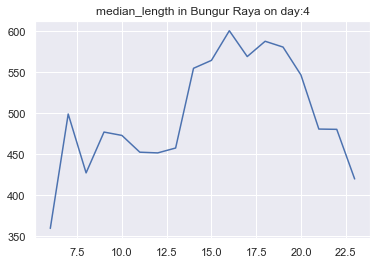

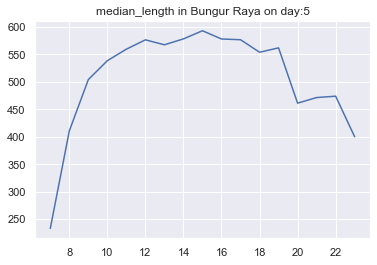

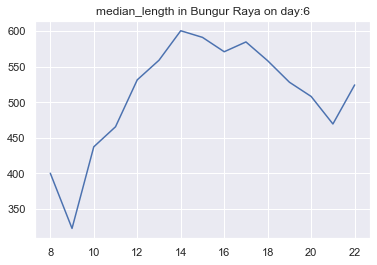

Getting Cagar Alam Selatan subset from data, result: (338, 13)


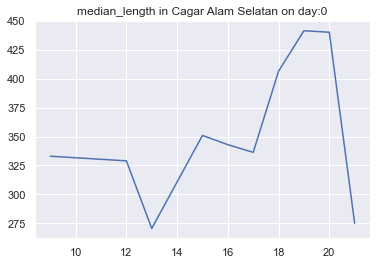

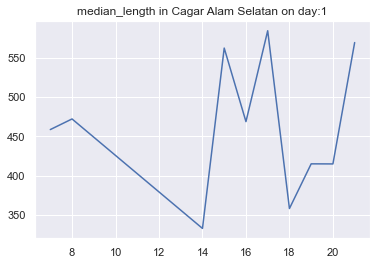

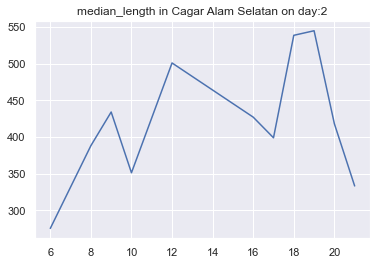

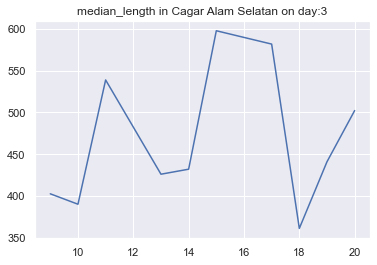

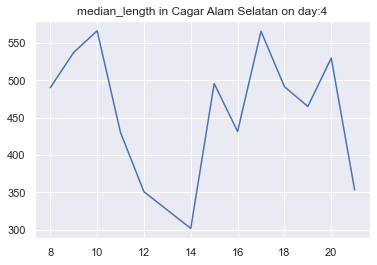

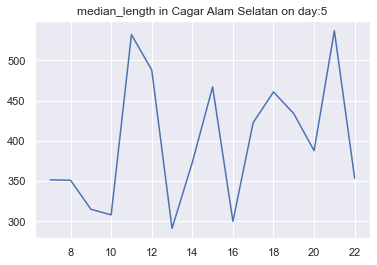

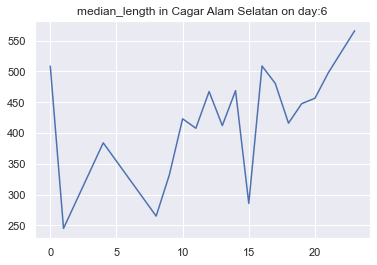

In [35]:
streets_df = dict()

for bus_street in bussiest_streets:
    streets_df[bus_street] = plot_tod_on_street(data_jams, bus_street, 'median_length', True)

## Preprocessing Dataset

Untuk melakukan preprocessing, dataset yang akan digunakan merupakand data_jams dan data_alerts yang digunakan untuk melakukan forecasting kemacetan pada 5 ruas jalan yang sering mengalami kemacetan berdasarkan hasil pivot data_jams

### Create Validation Dataset 

get last week dataset for validation

In [36]:
def validation_split_dataset(df, street: str):
    
    # get street data
    df1 = get_street_data(df, street)

    # convert timestamps to datetime
    df1['time'] = pd.to_datetime(df1['time'], format='%Y-%m-%d %X.000')

    # categorize timestamps to weekdays
    df2 = categorize_days(df1)

    # categorize timestamps to time on day
    df2['time_on_day'] =  df2['time'].dt.hour
    
    # plot days 
    store = dict()
    valid = dict()
    for d in range(7):
        # get last 20% dataset
        temp = df2[df2['weekdays'] == d].copy()
        temp.reset_index(inplace=True, drop=True)
        n = int(0.8*(len(temp['weekdays'])))
        store[d] = temp.loc[:n]
        valid[d] = temp.loc[n:]
        
        print(f"input shape: {df2[df2['weekdays'] == d].shape}, with split on: {n}")
        print(f"store shape: {store[d].shape}")
        print(f"valid shape: {valid[d].shape}")
    return store, valid

In [40]:
# Trial
store, valid = validation_split_dataset(data_jams,'Tol Jagorawi')

Getting Tol Jagorawi subset from data, result: (935, 13)
input shape: (142, 15), with split on: 113
store shape: (114, 15)
valid shape: (29, 15)
input shape: (139, 15), with split on: 111
store shape: (112, 15)
valid shape: (28, 15)
input shape: (73, 15), with split on: 58
store shape: (59, 15)
valid shape: (15, 15)
input shape: (150, 15), with split on: 120
store shape: (121, 15)
valid shape: (30, 15)
input shape: (146, 15), with split on: 116
store shape: (117, 15)
valid shape: (30, 15)
input shape: (179, 15), with split on: 143
store shape: (144, 15)
valid shape: (36, 15)
input shape: (106, 15), with split on: 84
store shape: (85, 15)
valid shape: (22, 15)


In [41]:
bussiest_streets = street_pv_irr.head(10).index.to_list()
bussiest_streets

['Abdul Wahab',
 'Abdurrahman',
 'Anggrek',
 'Arah Tol Lkr Luar/TMII/Cawang',
 'Arif Rahman Hakim',
 'Bahagia',
 'Bonang Raya',
 'Bukit Cinere',
 'Bungur Raya',
 'Cagar Alam Selatan']

In [59]:
streets_store = dict()
streets_valid = dict()

for bus_street in bussiest_streets:
    streets_store[bus_street], streets_valid[bus_street] = validation_split_dataset(data_jams,bus_street)

Getting Abdul Wahab subset from data, result: (1551, 13)
input shape: (219, 15), with split on: 175
store shape: (176, 15)
valid shape: (44, 15)
input shape: (184, 15), with split on: 147
store shape: (148, 15)
valid shape: (37, 15)
input shape: (200, 15), with split on: 160
store shape: (161, 15)
valid shape: (40, 15)
input shape: (182, 15), with split on: 145
store shape: (146, 15)
valid shape: (37, 15)
input shape: (237, 15), with split on: 189
store shape: (190, 15)
valid shape: (48, 15)
input shape: (259, 15), with split on: 207
store shape: (208, 15)
valid shape: (52, 15)
input shape: (270, 15), with split on: 216
store shape: (217, 15)
valid shape: (54, 15)
Getting Abdurrahman subset from data, result: (80, 13)
input shape: (11, 15), with split on: 8
store shape: (9, 15)
valid shape: (3, 15)
input shape: (2, 15), with split on: 1
store shape: (2, 15)
valid shape: (1, 15)
input shape: (12, 15), with split on: 9
store shape: (10, 15)
valid shape: (3, 15)
input shape: (21, 15), wit

### Split

In [57]:
def average_on_hours(df, street: str):
    
    store = dict()
    for d in range(7):
        # average weekdays on time for forecasting model
        d_pv = average_weekdays_on_time(df[d], d)
        store[d] = d_pv
        
    return store

In [60]:
streets_avg = dict()

for bus_street in bussiest_streets:
    streets_avg[bus_street] = average_on_hours(streets_store[bus_street],'median_length',)

Using Left Join to join data_jams with data_alerts for every bussiest streets

In [61]:
streets_valid['Abdul Wahab'][0].head()

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,weekdays,time_on_day
175,2022-08-22 15:00:00,32.76,KOTA DEPOK,Abdul Wahab,1,1202.0,79.0,18.39,5,36435109,2022-08-22,1.0,"MULTILINESTRING ((106.761199 -6.39177, 106.761...",0,15
176,2022-08-22 15:00:00,32.76,KOTA DEPOK,Abdul Wahab,2,1132.0,78.0,18.13,1,36435110,2022-08-22,2.0,"LINESTRING (106.74959 -6.367888, 106.749702 -6...",0,15
177,2022-08-22 16:00:00,32.76,KOTA DEPOK,Abdul Wahab,1,1117.5,78.0,19.21,28,36435276,2022-08-22,1.0,"MULTILINESTRING ((106.74959 -6.367888, 106.749...",0,16
178,2022-08-22 16:00:00,32.76,KOTA DEPOK,Abdul Wahab,2,670.0,88.0,13.40,53,36435277,2022-08-22,2.0,"MULTILINESTRING ((106.749425 -6.366796, 106.74...",0,16
179,2022-08-22 16:00:00,32.76,KOTA DEPOK,Abdul Wahab,3,284.0,169.0,4.95,2,36435278,2022-08-22,3.0,"LINESTRING (106.74886 -6.364295, 106.749186 -6...",0,16


### Save Dataset

In [45]:
print(PATH_DATA)

D:/DSLS/Data Science/data/raw/


In [62]:
filename = '/preprocessed_dataset.pkl'
with open(PATH_DATA+filename, 'wb') as f:
  pickle.dump(streets_avg,f)


In [63]:
filename = '/validation_dataset.pkl'
with open(PATH_DATA+filename, 'wb') as f:
  pickle.dump(streets_valid,f)

In [64]:
filename = '/recurring_dataset.pkl'
with open(PATH_DATA+filename, 'wb') as f:
  pickle.dump(streets_store,f)
